In [1]:
# import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_csv("OnlineRetail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Lọc dữ liệu cần thiết cho mục tiêu 1
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
d1 = df[['InvoiceNo', 'InvoiceDate']]
d1 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
d1 = d1.set_index(['InvoiceDate'])
d2 = d1['2011']
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.date).count()

<ipython-input-4-b6dda2fd60ad>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2 = d1['2011']


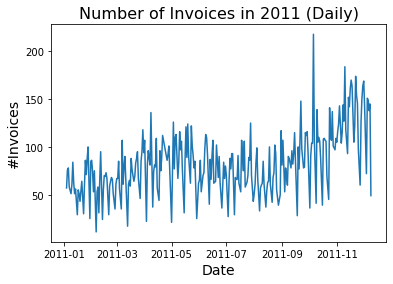

In [5]:
# Vẽ biểu đồ đường.
x = d3.index.get_level_values(0)
plt.plot(x, d3['InvoiceDate'])
plt.title('Number of Invoices in 2011 (Daily)', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()

In [6]:
# bNhận xét:
# Số lượng đơn hàng ngày có sự thay đổi mạnh.
# Giữa tháng 10 và 11 có 1 ngày có số đơn tăng đột biến.
# Tuy nhiên, biểu đồ này không thể hiện được việc thiếu dữ liệu trong 1 số ngày (do cách nhóm dữ liệu).

In [7]:
# Lấy dữ liệu cần thiết cho mục tiêu 2
d4 = d2.groupby(by=d2['InvoiceDate'].dt.month).count()
print(d4)

             InvoiceDate  InvoiceNo
InvoiceDate                        
1                   1476       1476
2                   1393       1393
3                   1983       1983
4                   1744       1744
5                   2162       2162
6                   2012       2012
7                   1927       1927
8                   1737       1737
9                   2327       2327
10                  2637       2637
11                  3462       3462
12                  1015       1015


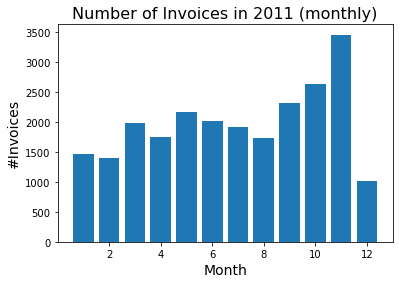

In [8]:
# Vẽ biểu đồ cột so sánh số lượng đơn hàng trong mỗi tháng năm 2011
x = d4.index.get_level_values(0)
plt.bar(x, d4['InvoiceDate'])
plt.title('Number of Invoices in 2011 (monthly)', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()

In [ ]:
# Nhận xét:
# 3 tháng 9, 10, 11 có số lượng đơn hàng tăng đáng kể, trong đó tháng 11 có số đơn hàng cao nhất.
# Tháng 12 có tổng số lượng đơn hàng thấp nhất